In [1]:
%matplotlib notebook
from beam_tomo import *
plt.rcParams['figure.max_open_warning'] = 50
from scipy.optimize import curve_fit

# Previous work on beam tomography 

Link for report with previous beam tomography:(link)[https://docs.google.com/document/d/1uOGDw6qHZKiGV28OnOs043JRSdri8LaaIsc8oYo4Qxg/edit#bookmark=id.4wuwfttv8kr]


# Description of measurements 

1. Acquisition #1 - 17.29.50 tomography.pkl (z from 14.6 to 16.6, PWM = 7%, exp = 1/40 000, 25us)
2. Acquisition #2 - 17.44.35 tomography.pkl (z from 14.6 to 17.6, PWM = 7%, exp = 1/40 000, 25us)

3. Acquisition #3 - 17.50.51 tomography.pkl (z from 14.6 to 18.6, PWM = 8%, exp = 1/40 000, 25us) - seems decoupled

4. Acquisition #4 - (re-coupled) - 17.56.48 tomography.pkl (z from 14.7 to 18.7)
5. Acquisition #5 - 18.02.48 tomography.pkl -same as acquisition 4, after rechecking coupling;


# List and load measurements 

In [2]:
filenames = [item for item in os.listdir() if ".pkl" in item]

#Parameters
filename = filenames[4]
shape = (3, 10)
roi_width = 100

#load data
tomo = Tomography(filename, (3,10), roi_width)
tomo.load_data()

Loaded
Tomography measurement:

        - Filename = 18.02.48 tomography.pkl

        - Number of beam rows = 3

        - Number of beam cols = 10

        - Z-spacing: 0.100mm

        - Number of cross sections: 40
        


# 3. Find rotation angle and spacing

In [3]:
tomo.find_rot_spacing(angle_min = 45, angle_max = 47, angle_step = 0.25)

Extracting rotation angle for the lowest z cross section.


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.06it/s]


Optimal rotation angle = 46.75deg
Extracting the grid spacing
Average spacing [px] between beams = 145.95
Updating the rotation angle and rotated image for each cross section.


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.05it/s]


# 4. Extract beam coord of first layer --> tomo.coord_init()

In [4]:
tomo.init_coords()

Coordinates of beam in first layer were determined.


# 5. Extract single beam positions and width across cross-sections

In [ ]:
#Single beam
id_x, id_y = 0, 0
tomo.complete_beam_coords(id_x, id_y, debug = False)

In [ ]:
#Iterative - just for monitoring processes
for id_x in tqdm(range(tomo.shape[0])):
    for id_y in range(tomo.shape[1]):
        print(f"id_x = {id_x}, id_y = {id_y}")
        tomo.complete_beam_coords(id_x, id_y, debug = False)

In [5]:
#All beams
tomo.complete_all_beams_coords(debug = False)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.47it/s]


In [ ]:
id_x,id_y = 0, 2
beam_i = tomo.beam_l[id_x][id_y]
print("\n")
print(beam_i.beam_coord_l)

print("\n")
print(beam_i.beam_width_l)

# 6. Plot single beam

## 6.1 plot beam trajectory and width

<IPython.core.display.Javascript object>


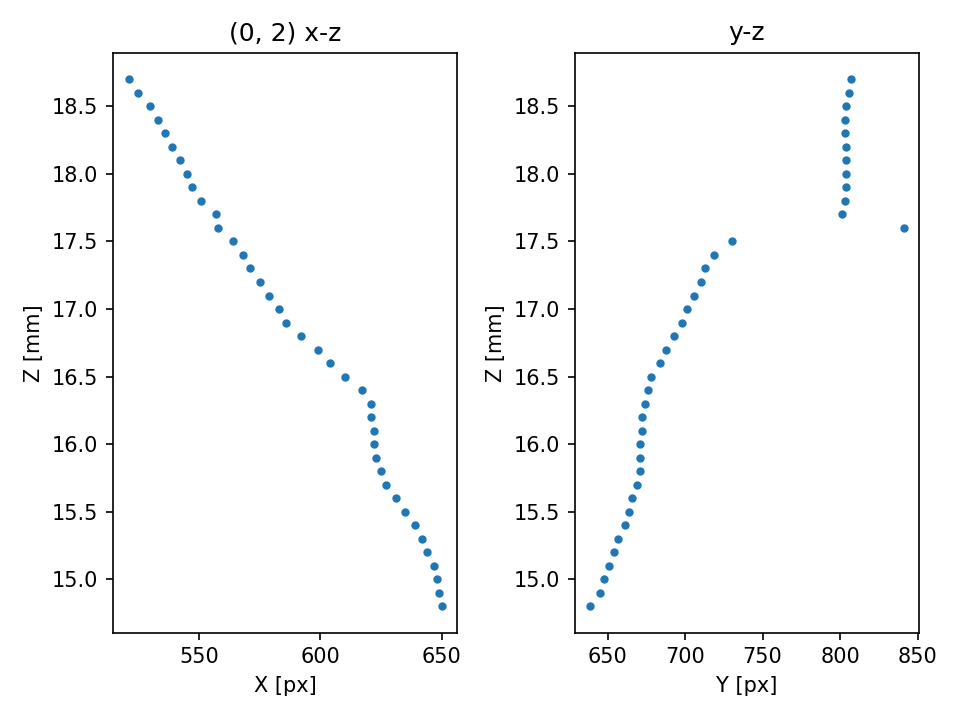

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:title={'center':'(0, 2) x-z'}, xlabel='X [px]', ylabel='Z [mm]'>,
        <AxesSubplot:title={'center':'y-z'}, xlabel='Y [px]', ylabel='Z [mm]'>],
       dtype=object))

In [6]:
id_x = 0
id_y = 2
beam_i = tomo.beam_l[id_x][id_y]
beam_i.plot_trajectory()


## Plot single beam width evolution

In [ ]:
id_x = 1
id_y = 2
beam_i = tomo.beam_l[id_x][id_y]
beam_i.plot_width(limit_z_fit=False)


## Plot ROIs

In [ ]:
id_x = 0
id_y = 1
beam_i =tomo.beam_l[id_x][id_y]
beam_i.plot_rois()
    

## 7. Visualise cross sections

In [ ]:
tomo.beam_l[2][8].beam_coord_l

In [ ]:
tomo.cross_sect_z_l[0]

In [ ]:
#for i in range(tomo.n_sections):
for i in range(10):
    
    tomo.plot_cross_section(i)

<IPython.core.display.Javascript object>


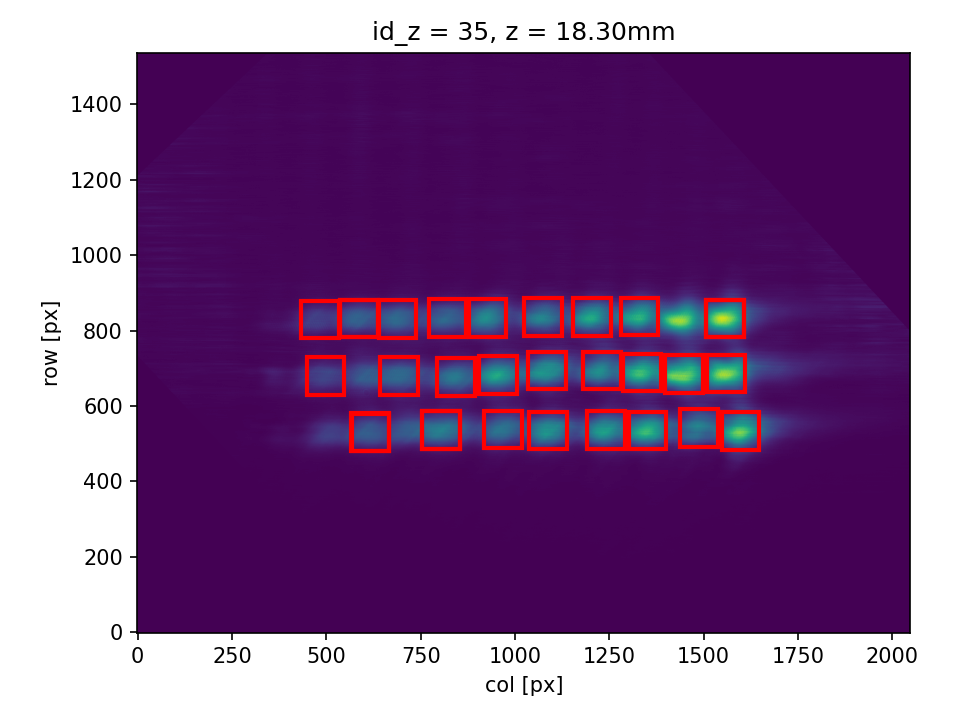

<IPython.core.display.Javascript object>


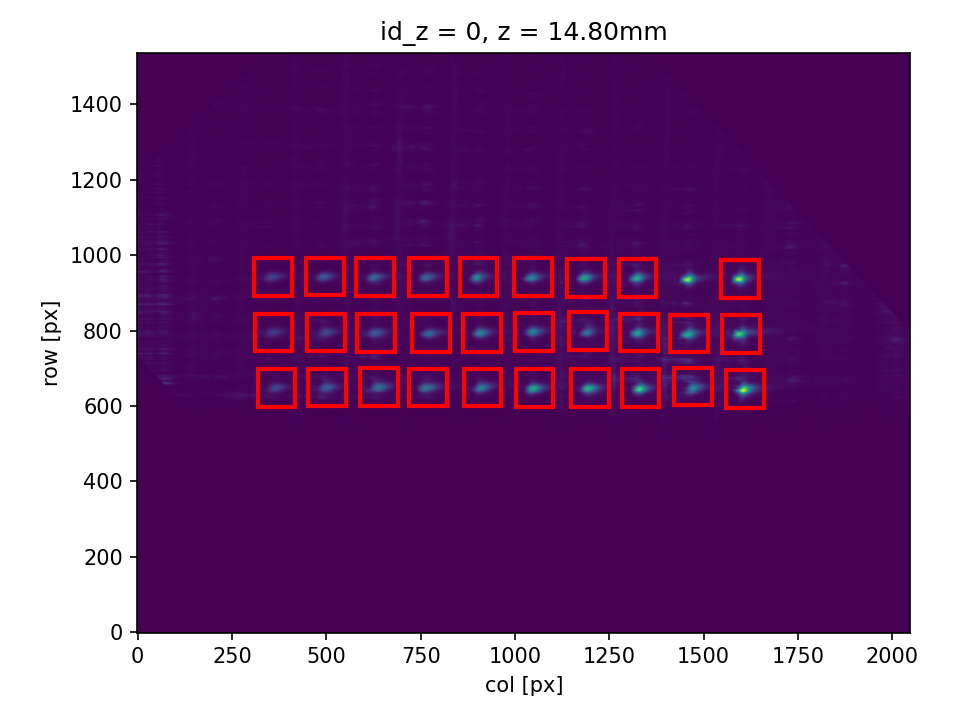

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'id_z = 0, z = 14.80mm'}, xlabel='col [px]', ylabel='row [px]'>)

In [23]:
tomo.plot_cross_section(35)
tomo.plot_cross_section(0)


# 7. Extract beam parameters (tilt_x, tilt_y, div_x, div_y) 

## Find direction cosines

Tomo.max_z_fit and Tomo.max_z_idx_fit have been updated.
beam_i.max_z_fit and beam_i.max_z_idx_fit have been updated in all beams.
The direction cosines of the beam idx=0, idy = 0 have been updated:
e_x = -0.062, e_y = 0.159, e_z = 0.985


<IPython.core.display.Javascript object>


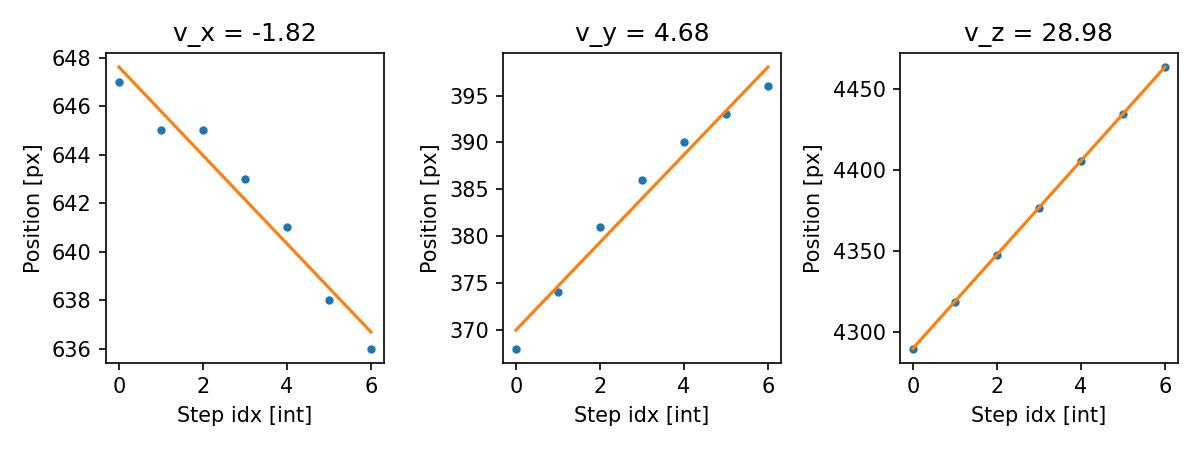

e_x = -0.06 --> alpha = 93.55deg
e_y = 0.16 --> beta = 80.85deg
e_z = 0.99 --> gamma = 9.83deg
The direction cosines of the beam idx=0, idy = 1 have been updated:
e_x = -0.068, e_y = 0.142, e_z = 0.987


<IPython.core.display.Javascript object>


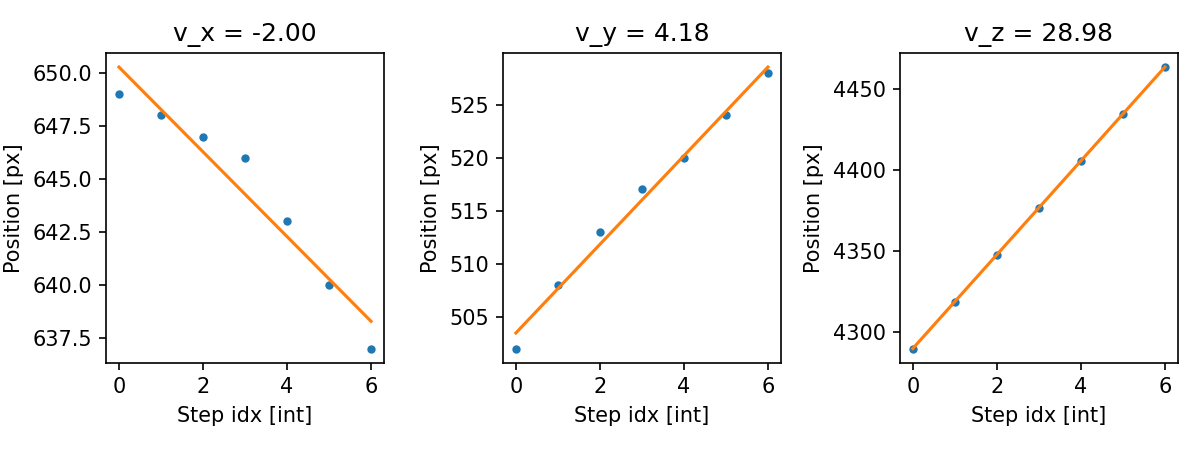

e_x = -0.07 --> alpha = 93.91deg
e_y = 0.14 --> beta = 81.81deg
e_z = 0.99 --> gamma = 9.08deg
The direction cosines of the beam idx=0, idy = 2 have been updated:
e_x = -0.062, e_y = 0.117, e_z = 0.991


<IPython.core.display.Javascript object>


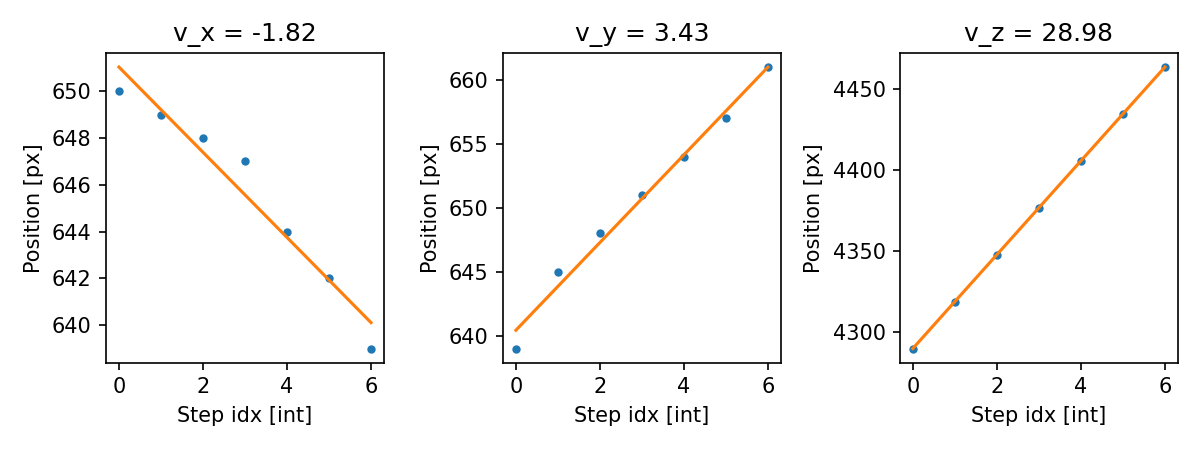

e_x = -0.06 --> alpha = 93.57deg
e_y = 0.12 --> beta = 83.27deg
e_z = 0.99 --> gamma = 7.63deg
The direction cosines of the beam idx=0, idy = 3 have been updated:
e_x = -0.056, e_y = 0.086, e_z = 0.995


<IPython.core.display.Javascript object>


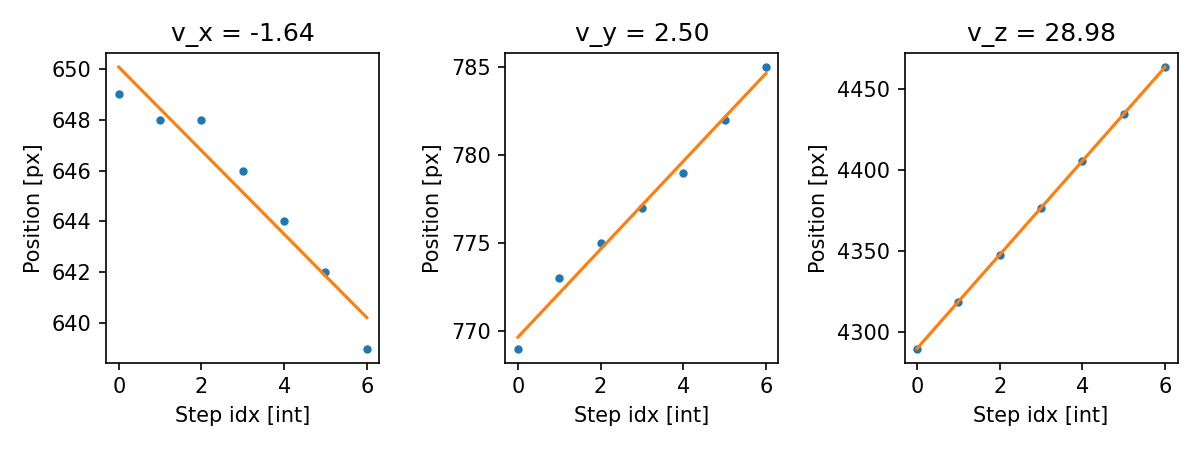

e_x = -0.06 --> alpha = 93.23deg
e_y = 0.09 --> beta = 85.08deg
e_z = 0.99 --> gamma = 5.89deg
The direction cosines of the beam idx=0, idy = 4 have been updated:
e_x = -0.056, e_y = 0.080, e_z = 0.995


<IPython.core.display.Javascript object>


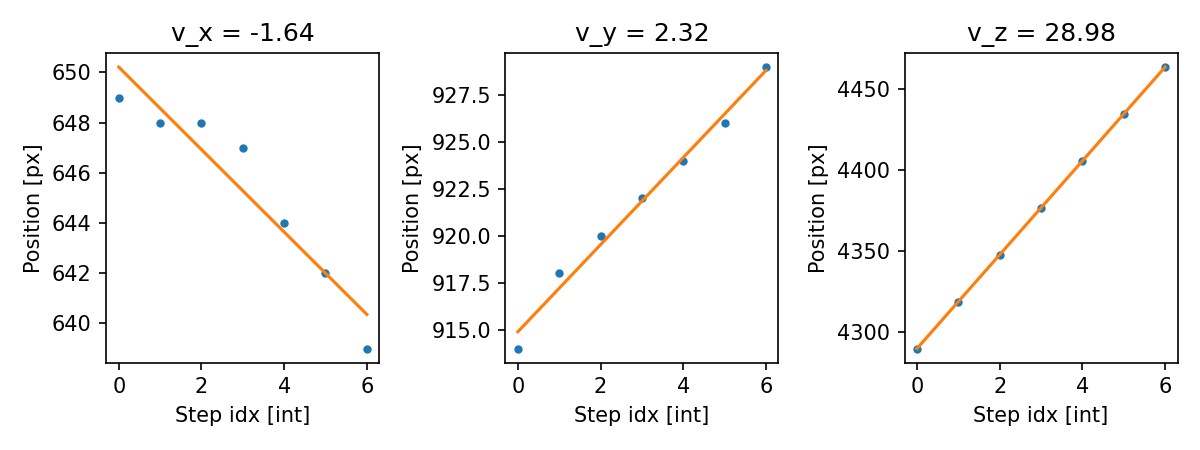

e_x = -0.06 --> alpha = 93.23deg
e_y = 0.08 --> beta = 85.43deg
e_z = 1.00 --> gamma = 5.60deg
The direction cosines of the beam idx=0, idy = 5 have been updated:
e_x = -0.063, e_y = 0.061, e_z = 0.996


<IPython.core.display.Javascript object>


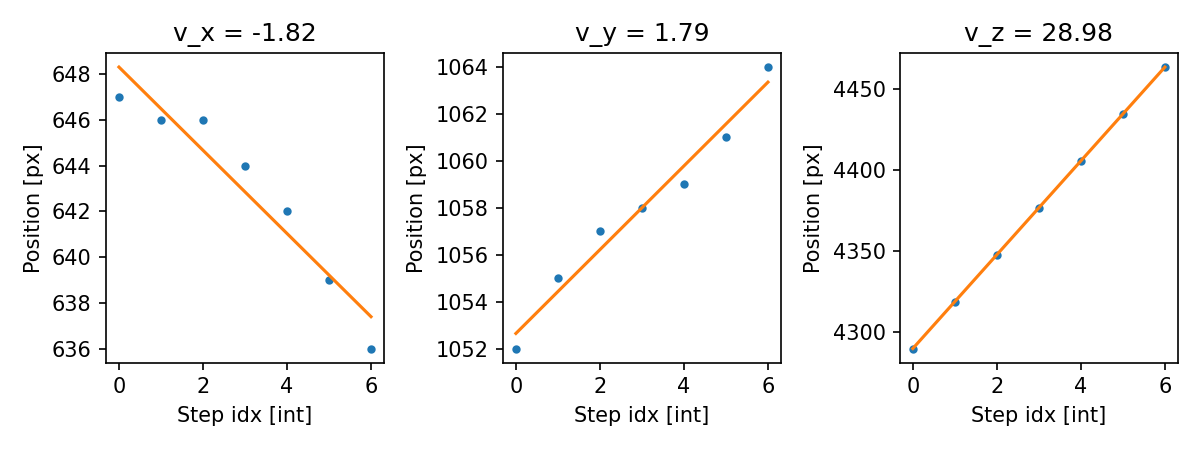

e_x = -0.06 --> alpha = 93.59deg
e_y = 0.06 --> beta = 86.48deg
e_z = 1.00 --> gamma = 5.03deg
The direction cosines of the beam idx=0, idy = 6 have been updated:
e_x = -0.059, e_y = 0.102, e_z = 0.993


<IPython.core.display.Javascript object>


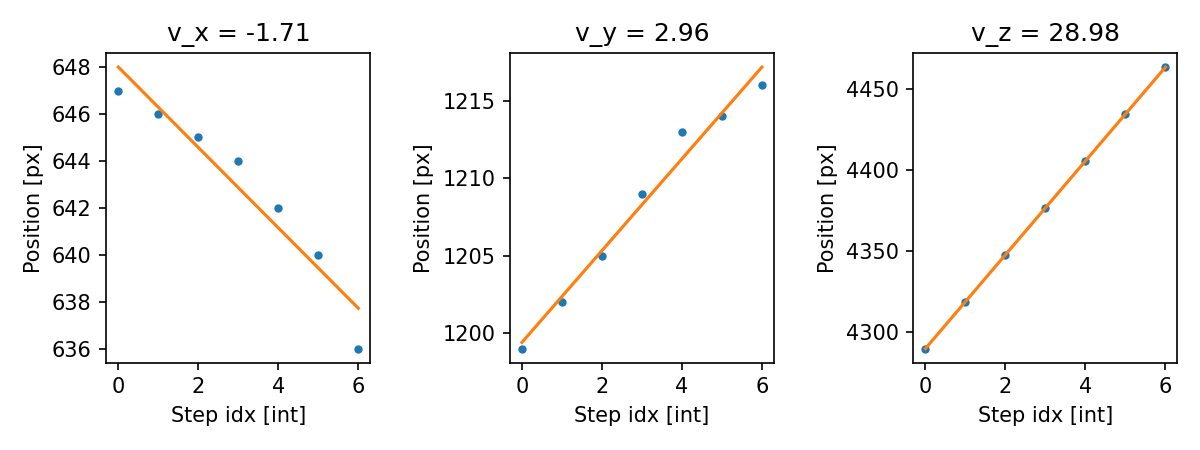

e_x = -0.06 --> alpha = 93.37deg
e_y = 0.10 --> beta = 84.17deg
e_z = 0.99 --> gamma = 6.74deg
The direction cosines of the beam idx=0, idy = 7 have been updated:
e_x = -0.057, e_y = 0.041, e_z = 0.998


<IPython.core.display.Javascript object>


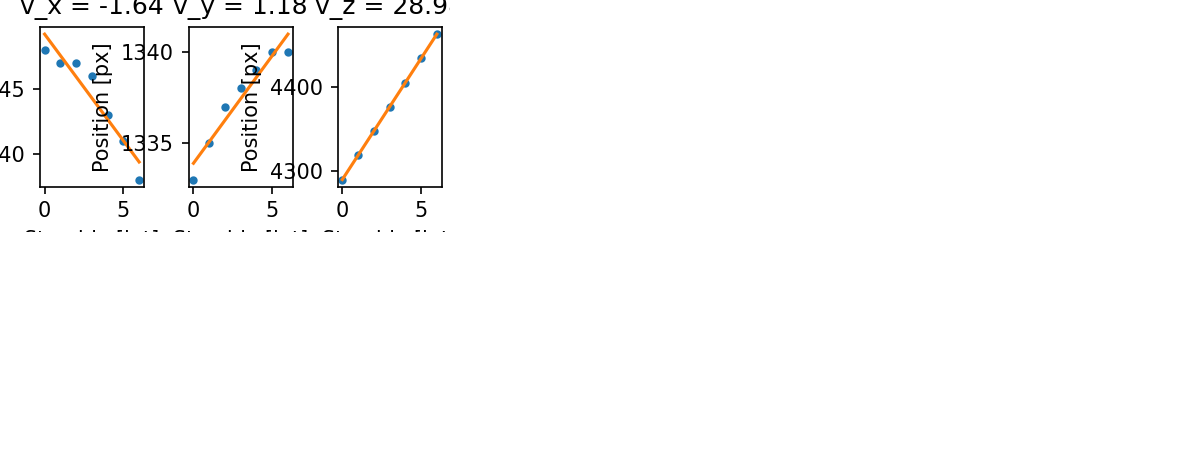

e_x = -0.06 --> alpha = 93.24deg
e_y = 0.04 --> beta = 87.68deg
e_z = 1.00 --> gamma = 3.99deg
The direction cosines of the beam idx=0, idy = 8 have been updated:
e_x = -0.066, e_y = 0.021, e_z = 0.998


<IPython.core.display.Javascript object>


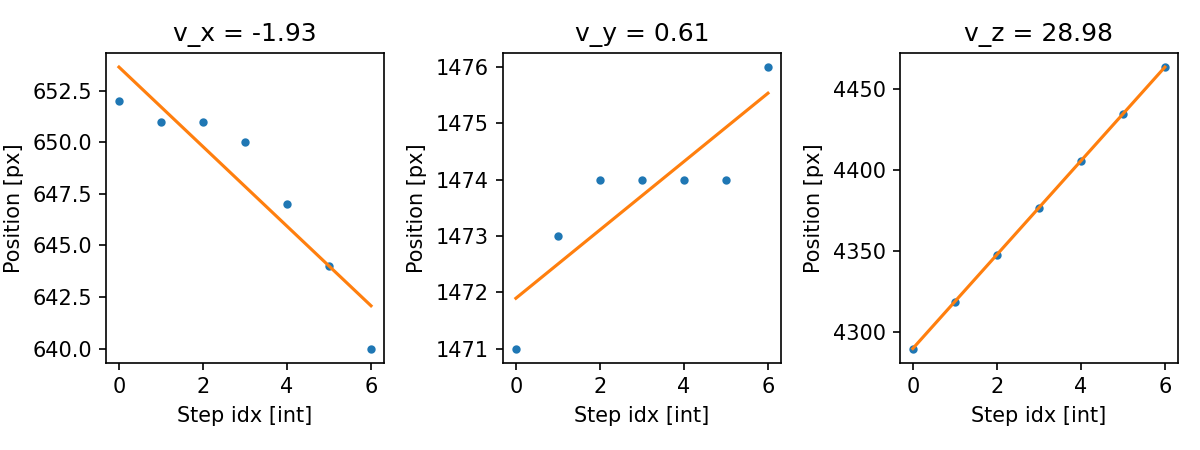

e_x = -0.07 --> alpha = 93.81deg
e_y = 0.02 --> beta = 88.80deg
e_z = 1.00 --> gamma = 3.99deg
The direction cosines of the beam idx=0, idy = 9 have been updated:
e_x = -0.063, e_y = 0.000, e_z = 0.998


C:\Users\Rui\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


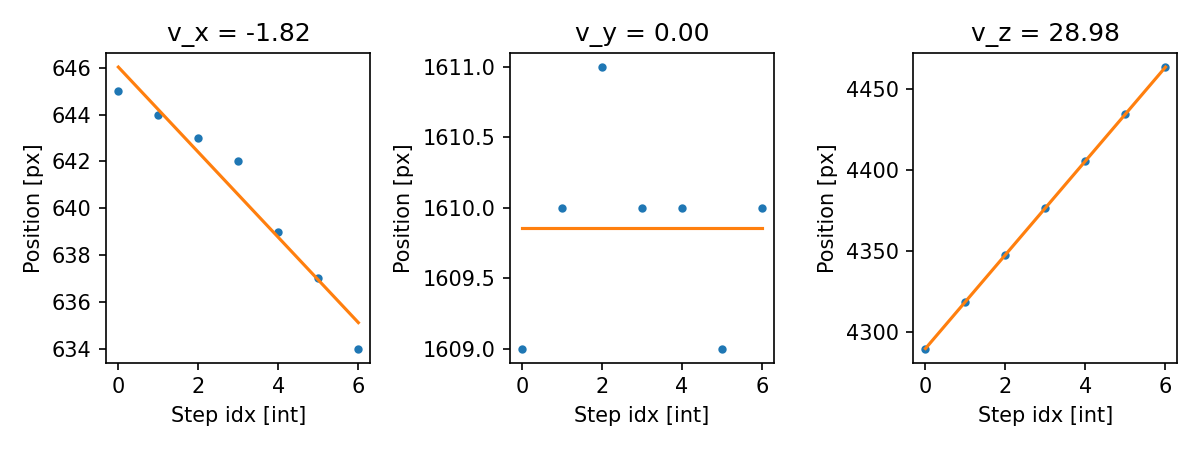

e_x = -0.06 --> alpha = 93.60deg
e_y = 0.00 --> beta = 90.00deg
e_z = 1.00 --> gamma = 3.60deg
The direction cosines of the beam idx=1, idy = 0 have been updated:
e_x = -0.060, e_y = 0.197, e_z = 0.979


<IPython.core.display.Javascript object>


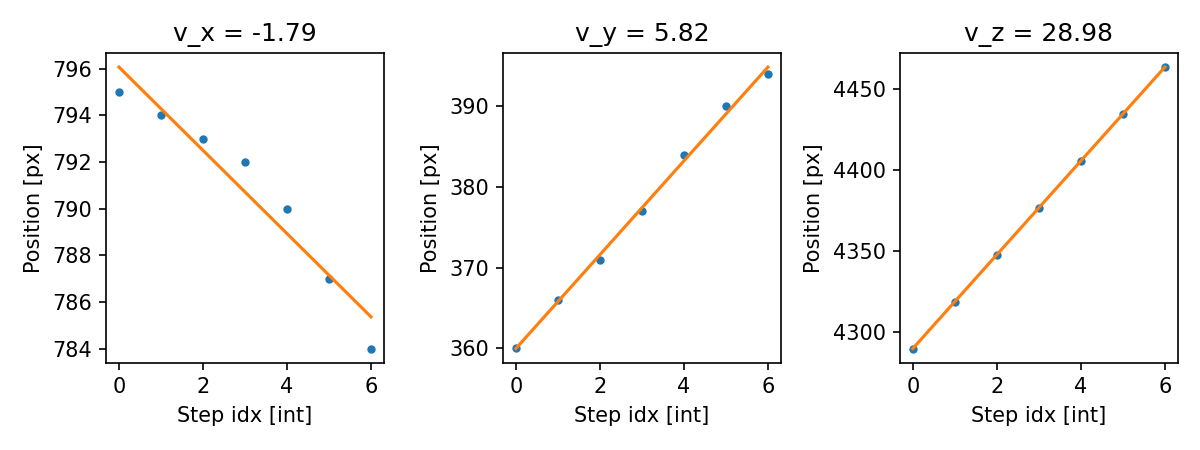

e_x = -0.06 --> alpha = 93.46deg
e_y = 0.20 --> beta = 78.66deg
e_z = 0.98 --> gamma = 11.87deg
The direction cosines of the beam idx=1, idy = 1 have been updated:
e_x = -0.058, e_y = 0.209, e_z = 0.976


<IPython.core.display.Javascript object>


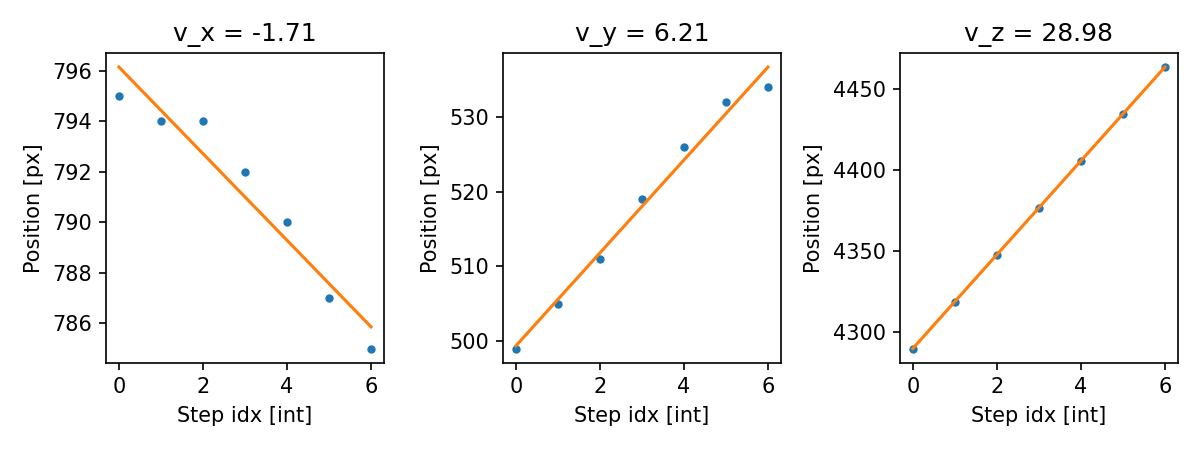

e_x = -0.06 --> alpha = 93.31deg
e_y = 0.21 --> beta = 77.92deg
e_z = 0.98 --> gamma = 12.54deg
The direction cosines of the beam idx=1, idy = 2 have been updated:
e_x = -0.052, e_y = 0.156, e_z = 0.986


<IPython.core.display.Javascript object>


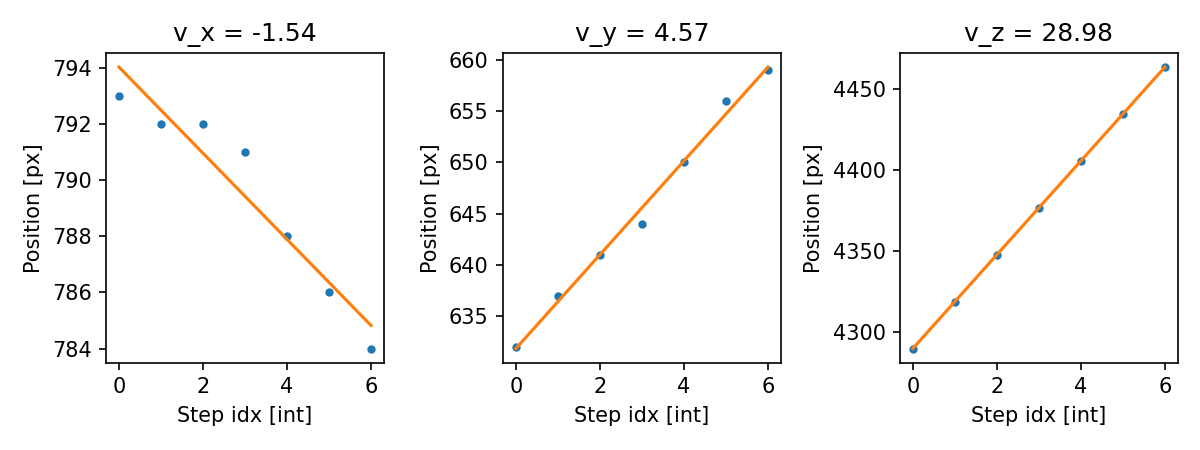

e_x = -0.05 --> alpha = 93.00deg
e_y = 0.16 --> beta = 81.05deg
e_z = 0.99 --> gamma = 9.45deg
The direction cosines of the beam idx=1, idy = 3 have been updated:
e_x = -0.057, e_y = 0.125, e_z = 0.991


<IPython.core.display.Javascript object>


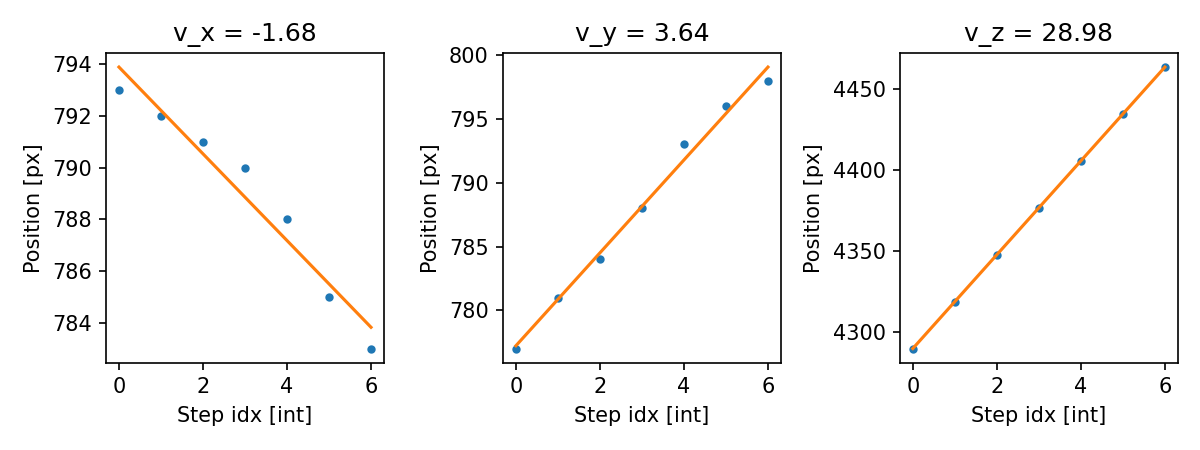

e_x = -0.06 --> alpha = 93.29deg
e_y = 0.12 --> beta = 82.85deg
e_z = 0.99 --> gamma = 7.88deg
The direction cosines of the beam idx=1, idy = 4 have been updated:
e_x = -0.059, e_y = 0.089, e_z = 0.994


<IPython.core.display.Javascript object>


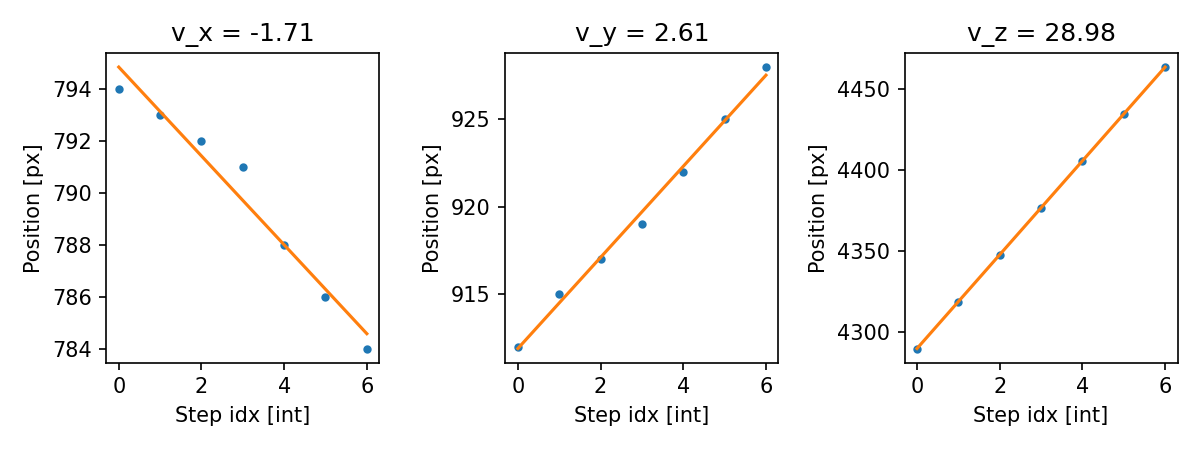

e_x = -0.06 --> alpha = 93.37deg
e_y = 0.09 --> beta = 84.87deg
e_z = 0.99 --> gamma = 6.14deg
The direction cosines of the beam idx=1, idy = 5 have been updated:
e_x = -0.059, e_y = 0.088, e_z = 0.994


<IPython.core.display.Javascript object>


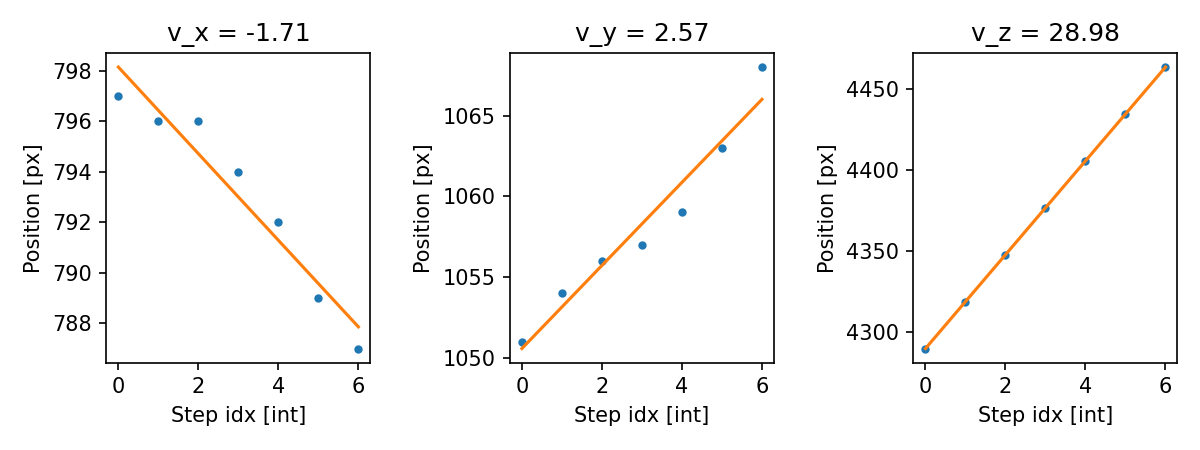

e_x = -0.06 --> alpha = 93.37deg
e_y = 0.09 --> beta = 84.94deg
e_z = 0.99 --> gamma = 6.09deg
The direction cosines of the beam idx=1, idy = 6 have been updated:
e_x = -0.069, e_y = 0.094, e_z = 0.993


<IPython.core.display.Javascript object>


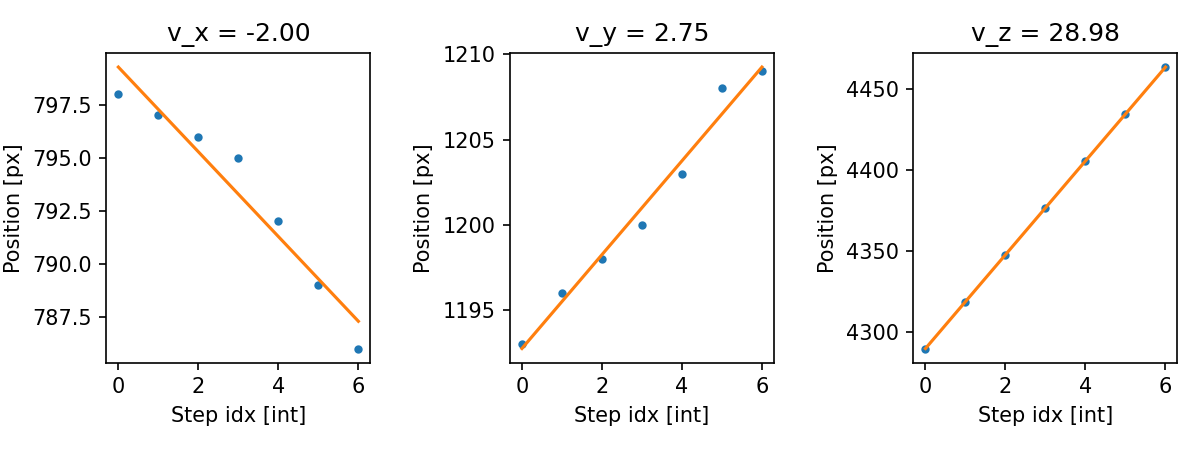

e_x = -0.07 --> alpha = 93.93deg
e_y = 0.09 --> beta = 84.59deg
e_z = 0.99 --> gamma = 6.69deg
The direction cosines of the beam idx=1, idy = 7 have been updated:
e_x = -0.066, e_y = 0.041, e_z = 0.997


<IPython.core.display.Javascript object>


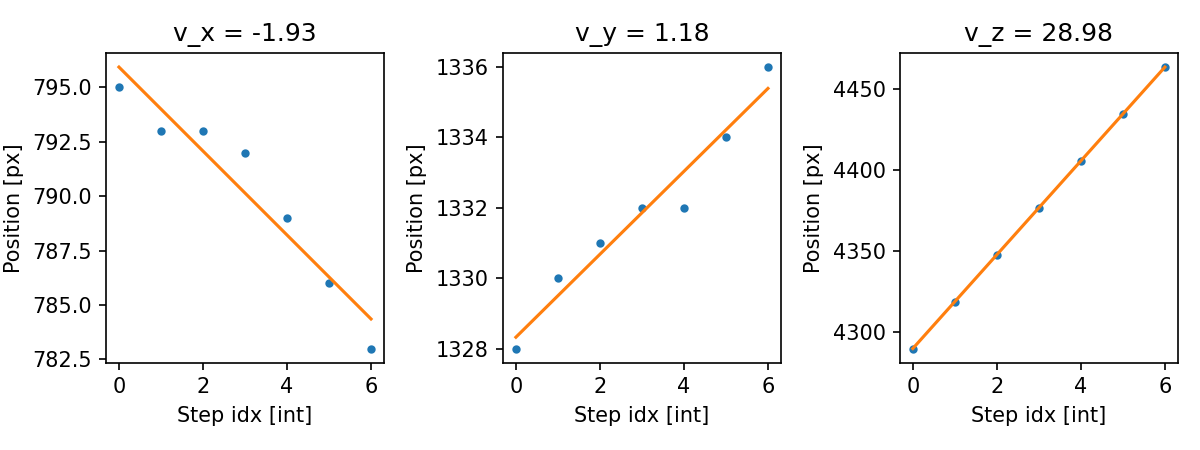

e_x = -0.07 --> alpha = 93.80deg
e_y = 0.04 --> beta = 87.68deg
e_z = 1.00 --> gamma = 4.46deg
The direction cosines of the beam idx=1, idy = 8 have been updated:
e_x = -0.064, e_y = -0.006, e_z = 0.998


<IPython.core.display.Javascript object>


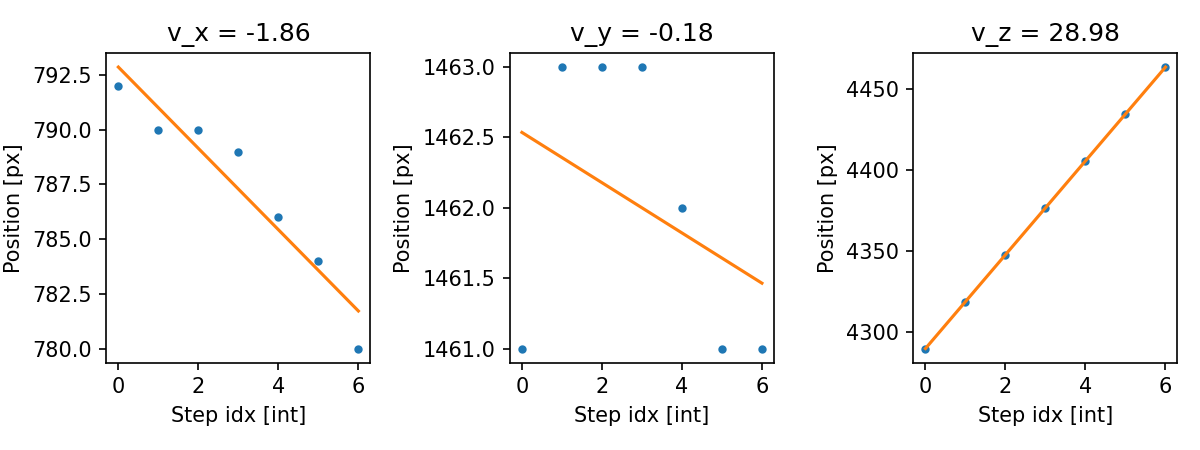

e_x = -0.06 --> alpha = 93.67deg
e_y = -0.01 --> beta = 90.35deg
e_z = 1.00 --> gamma = 3.68deg
The direction cosines of the beam idx=1, idy = 9 have been updated:
e_x = -0.054, e_y = -0.023, e_z = 0.998


<IPython.core.display.Javascript object>


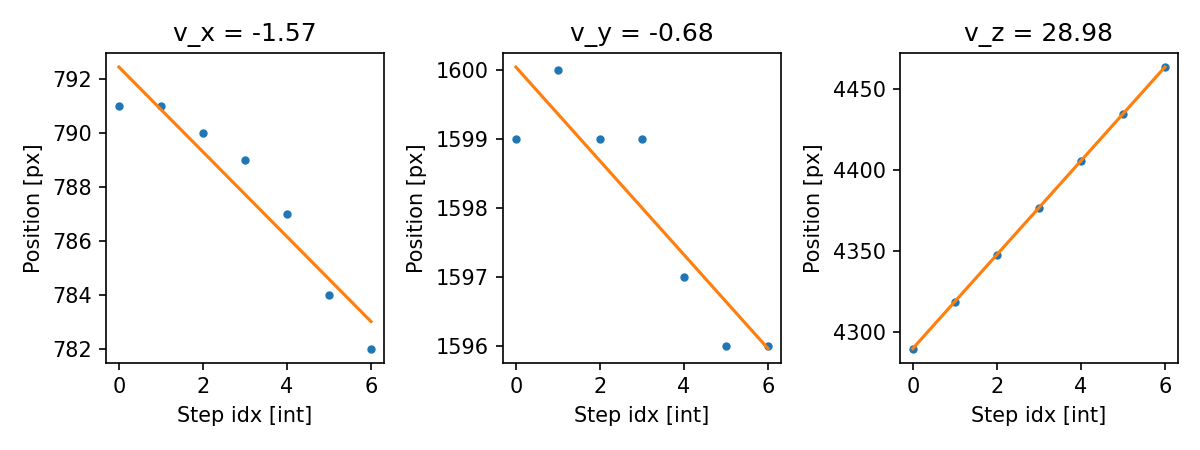

e_x = -0.05 --> alpha = 93.10deg
e_y = -0.02 --> beta = 91.34deg
e_z = 1.00 --> gamma = 3.38deg
The direction cosines of the beam idx=2, idy = 0 have been updated:
e_x = -0.065, e_y = 0.176, e_z = 0.982


<IPython.core.display.Javascript object>


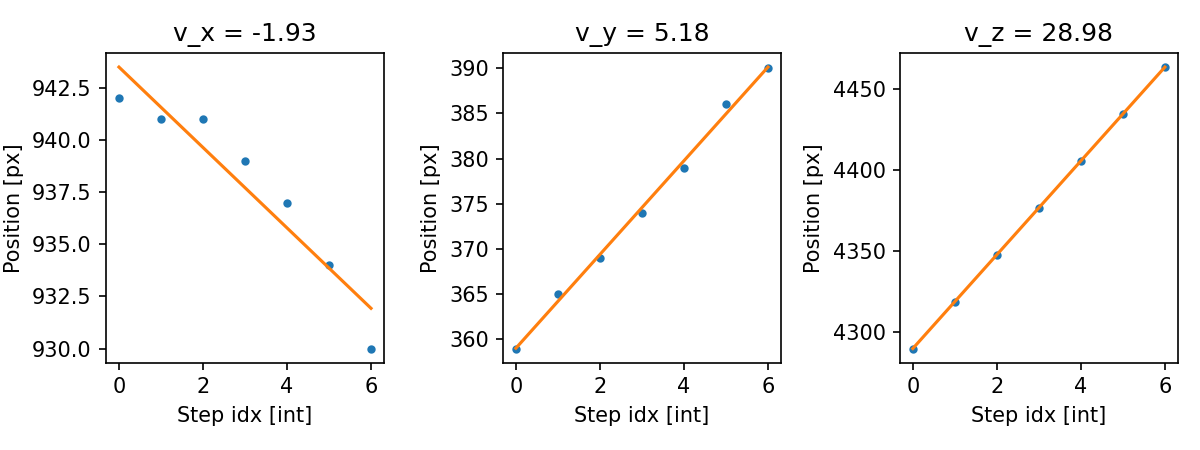

e_x = -0.07 --> alpha = 93.75deg
e_y = 0.18 --> beta = 79.89deg
e_z = 0.98 --> gamma = 10.80deg
The direction cosines of the beam idx=2, idy = 1 have been updated:
e_x = -0.064, e_y = 0.217, e_z = 0.974


<IPython.core.display.Javascript object>


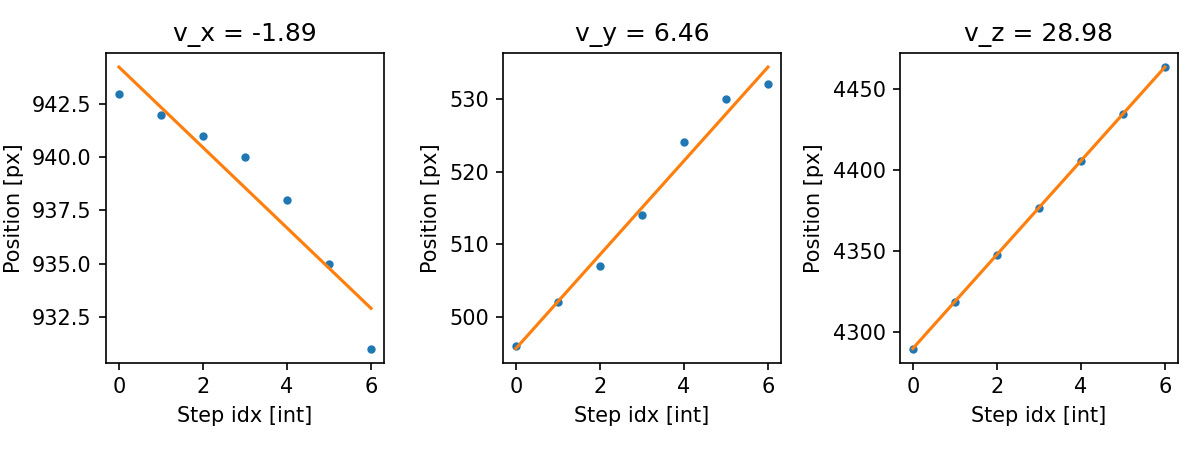

e_x = -0.06 --> alpha = 93.65deg
e_y = 0.22 --> beta = 77.45deg
e_z = 0.97 --> gamma = 13.08deg
The direction cosines of the beam idx=2, idy = 2 have been updated:
e_x = -0.086, e_y = 0.178, e_z = 0.980


<IPython.core.display.Javascript object>


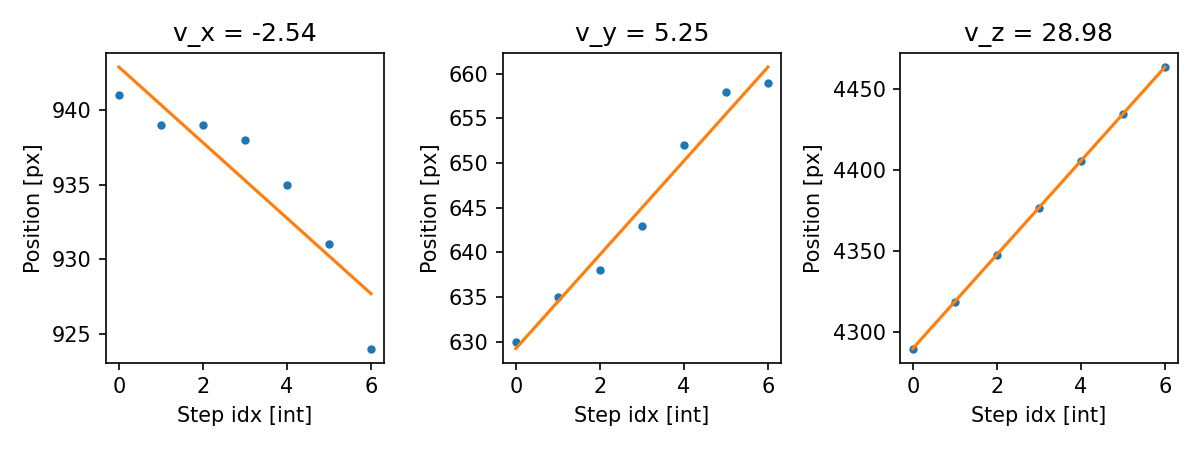

e_x = -0.09 --> alpha = 94.92deg
e_y = 0.18 --> beta = 79.77deg
e_z = 0.98 --> gamma = 11.37deg
The direction cosines of the beam idx=2, idy = 3 have been updated:
e_x = -0.091, e_y = 0.080, e_z = 0.993


<IPython.core.display.Javascript object>


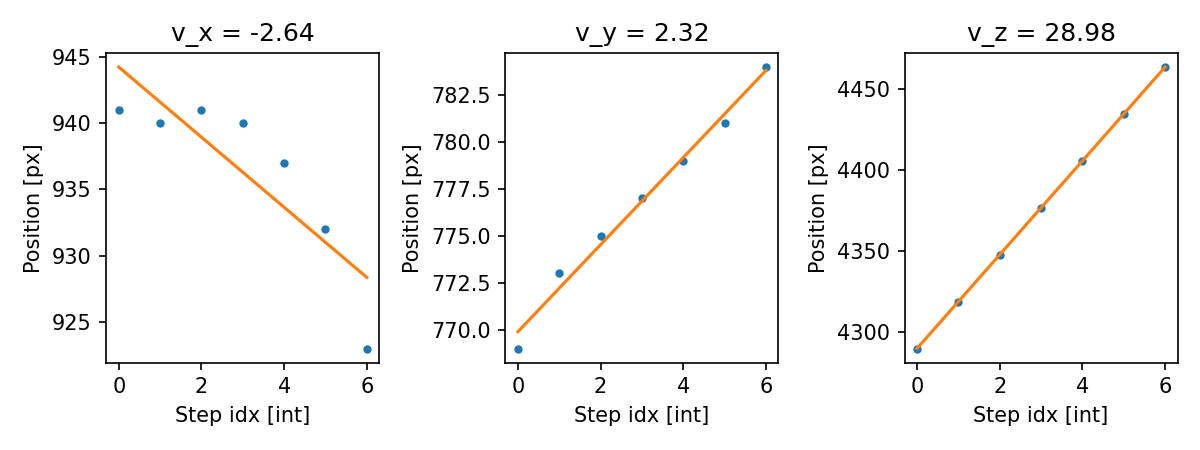

e_x = -0.09 --> alpha = 95.19deg
e_y = 0.08 --> beta = 85.44deg
e_z = 0.99 --> gamma = 6.92deg
The direction cosines of the beam idx=2, idy = 4 have been updated:
e_x = -0.065, e_y = 0.052, e_z = 0.997


<IPython.core.display.Javascript object>


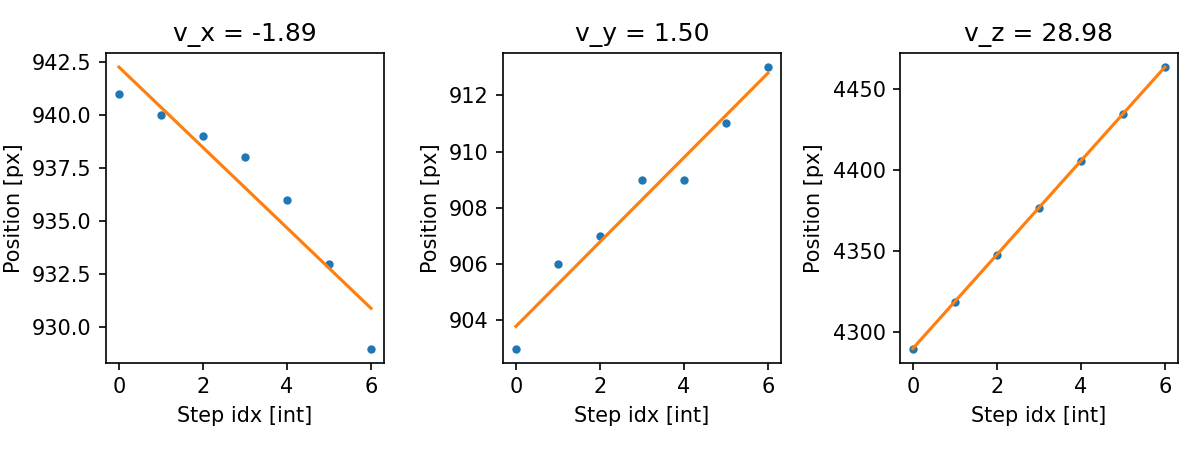

e_x = -0.07 --> alpha = 93.73deg
e_y = 0.05 --> beta = 87.04deg
e_z = 1.00 --> gamma = 4.76deg
The direction cosines of the beam idx=2, idy = 5 have been updated:
e_x = -0.055, e_y = 0.038, e_z = 0.998


<IPython.core.display.Javascript object>


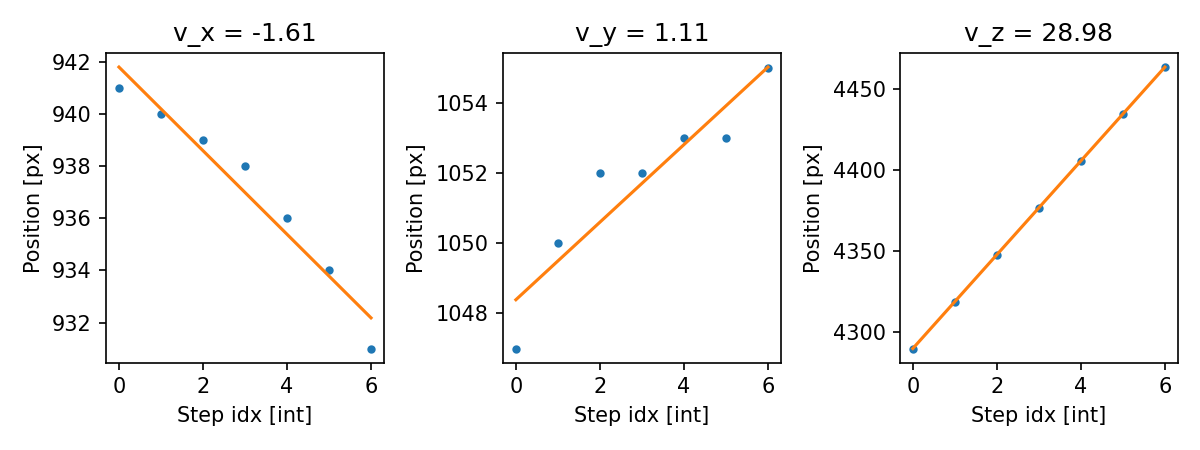

e_x = -0.06 --> alpha = 93.17deg
e_y = 0.04 --> beta = 87.82deg
e_z = 1.00 --> gamma = 3.85deg
The direction cosines of the beam idx=2, idy = 6 have been updated:
e_x = -0.063, e_y = 0.028, e_z = 0.998


<IPython.core.display.Javascript object>


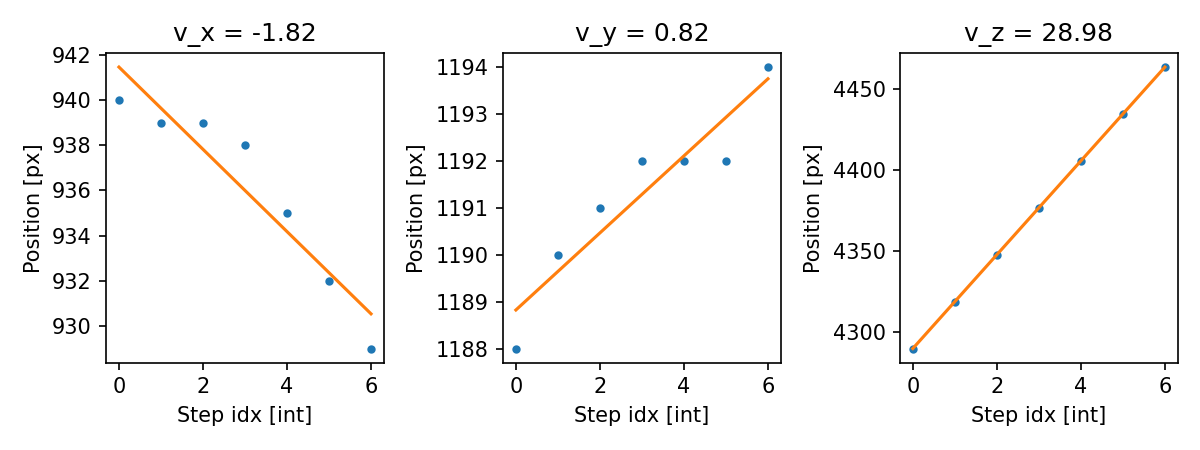

e_x = -0.06 --> alpha = 93.59deg
e_y = 0.03 --> beta = 88.38deg
e_z = 1.00 --> gamma = 3.94deg
The direction cosines of the beam idx=2, idy = 7 have been updated:
e_x = -0.053, e_y = 0.015, e_z = 0.998


<IPython.core.display.Javascript object>


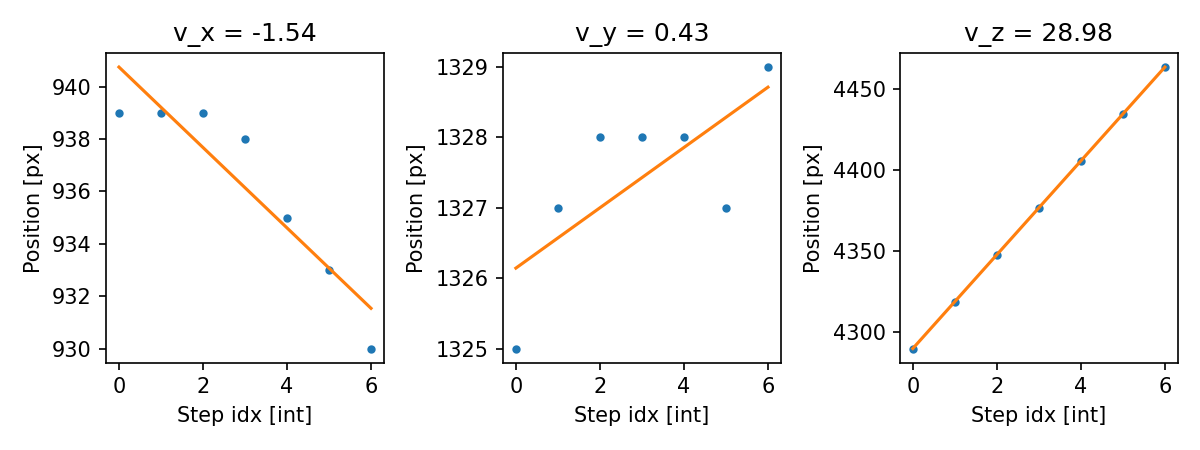

e_x = -0.05 --> alpha = 93.03deg
e_y = 0.01 --> beta = 89.15deg
e_z = 1.00 --> gamma = 3.15deg
The direction cosines of the beam idx=2, idy = 8 have been updated:
e_x = -0.057, e_y = -0.031, e_z = 0.998


<IPython.core.display.Javascript object>


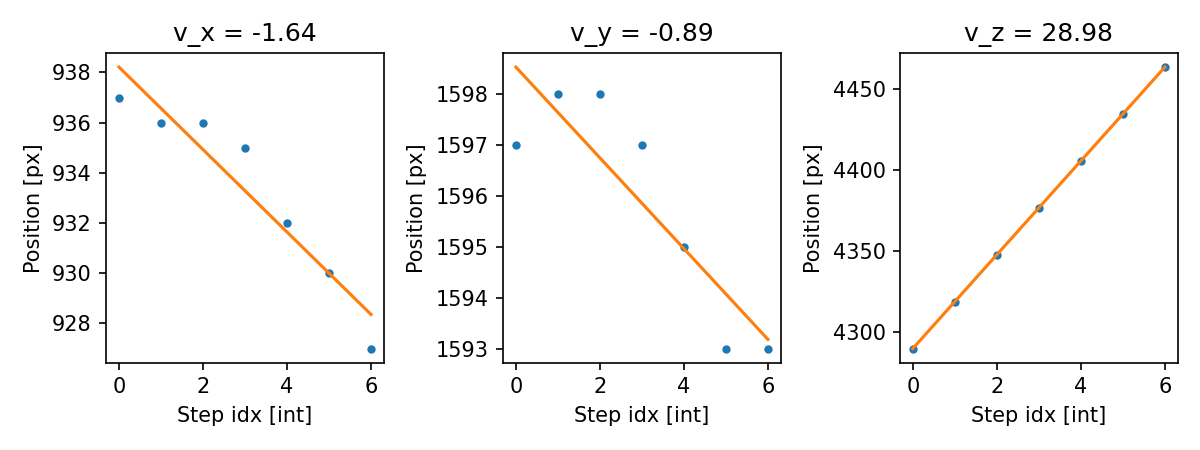

e_x = -0.06 --> alpha = 93.24deg
e_y = -0.03 --> beta = 91.76deg
e_z = 1.00 --> gamma = 3.69deg
The direction cosines of the beam idx=2, idy = 9 have been updated:
e_x = -0.057, e_y = -0.031, e_z = 0.998


<IPython.core.display.Javascript object>

e_x = -0.06 --> alpha = 93.24deg
e_y = -0.03 --> beta = 91.76deg
e_z = 1.00 --> gamma = 3.69deg


In [7]:
tomo.set_max_z(15.5)
tomo.find_dir_cos(debug = True) #loops over beam method beam_i.find_dir_cos()

In [ ]:
tomo.find_div(debug = True) #loops over beam method beam_i.find_div

## Find divergence angle

<IPython.core.display.Javascript object>


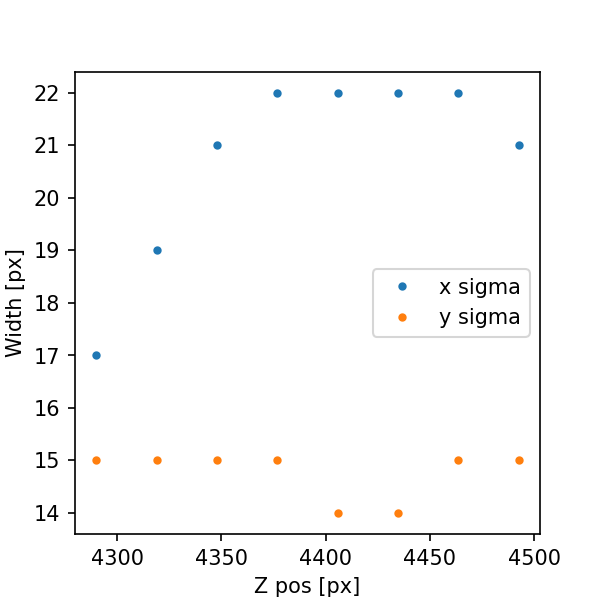

In [20]:
#for id_x in range(tomo.shape[0]):
#    for id_y in range(tomo.shape[1]):

id_x = 0
id_y = 0
beam_i = tomo.beam_l[id_x][id_y]

#set max_z_id
max_z_idx = 8

#extract beam_width arrays and z_arr
beam_width = np.array(beam_i.beam_width_l)
beam_width_x = beam_width[:max_z_idx, 0]
beam_width_y = beam_width[:max_z_idx, 1]
z_arr = np.array(beam_i.beam_coord_l)[:max_z_idx, 2]
z_px_arr = (z_arr*10**-3)/(tomo.pixel_size)



#plot beam_width_x vs z_arr and beam_width_y vs z_arr
f, ax = plt.subplots(figsize = (4, 4))
ax.plot(z_px_arr, beam_width_x , ".", label = "x sigma")
ax.plot(z_px_arr, beam_width_y, ".",label = "y sigma")
ax.set_ylabel("Width [px]")
ax.set_xlabel("Z pos [px]")
ax.legend()


#fit linear curve to width vs z to extract div_angle
#z_arr = beam_i.beam_coord_l[]



In [ ]:
print(e_x, e_y, e_z)

In [ ]:
np.linalg.norm([e_x, e_y, e_z])

In [ ]:
pos(0, 12, 1)

In [ ]:
id_x = 0
id_y = 0
for id_x in range(tomo.shape[0]):
    for id_y in range(tomo.shape[1]):
        beam_i =tomo.beam_l[id_x][id_y]
        beam_i.plot_trajectory(limit_z_fit = True)

# 8. Visualise cross sections with location of beams and ROIs

# 9. Visualise single beam (3D)

## Visualise first layer with ROI

In [ ]:
time_start = time.time()

#call tomo.coord_init()
exp_num_peaks = tomo.shape[0]*tomo.shape[1]
cross_i = tomo.cross_sect_l[0]
spacing = int(cross_i.spacing_px)
image_i = tomo.cross_sect_l[0].image_rot

peak_arr = feature.peak_local_max(image_i, num_peaks = exp_num_peaks, min_distance = int(spacing*0.9))

#pass info to cross section
#tomo.cross_sect_l[0].beam_coord_l = peak_arr

#pass info to each beam in tomo.beam_l
#for beam_i in tomo.beam_l:
#    beam_i.beam_coord_l = peak_arr

#time_stop = time.time()
#print("The task took", time_stop-time_start, "s to complete.")

## Beam and cross section classes

## Collect cross sections of the same beam for different z